### Import required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

### Loading the MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Preprocess the data

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

### Normalise the data

In [ ]:
scaler = MinMaxScaler()
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_train_flat_normalized = scaler.fit_transform(x_train_flat)
x_train_normalized = x_train_flat_normalized.reshape(x_train.shape)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_test_normalized = scaler.transform(x_test_flat).reshape(x_test.shape)

### Creating the model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

### Compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
375/375 [==============================] - 40s 107ms/step - loss: 2.6192 - accuracy: 0.9972 - val_loss: 0.0895 - val_accuracy: 0.9793
Epoch 2/20
375/375 [==============================] - 43s 114ms/step - loss: 0.4633 - accuracy: 0.9992 - val_loss: 0.0821 - val_accuracy: 0.9815
Epoch 3/20
375/375 [==============================] - 40s 107ms/step - loss: 0.2544 - accuracy: 0.9995 - val_loss: 0.0751 - val_accuracy: 0.9834
Epoch 4/20
375/375 [==============================] - 40s 106ms/step - loss: 0.1949 - accuracy: 0.9997 - val_loss: 0.0767 - val_accuracy: 0.9840
Epoch 5/20
375/375 [==============================] - 40s 108ms/step - loss: 0.2821 - accuracy: 0.9993 - val_loss: 0.0837 - val_accuracy: 0.9804
Epoch 6/20
375/375 [==============================] - 41s 110ms/step - loss: 0.1367 - accuracy: 0.9996 - val_loss: 0.0837 - val_accuracy: 0.9797


### Evaluating the model

In [ ]:
test_accuracy = model.evaluate(x_test_normalized, y_test, verbose=0)
print('Test accuracy:', test_accuracy)

Test accuracy: [0.041801050305366516, 0.9883999824523926]


### Plotting the structure of the model

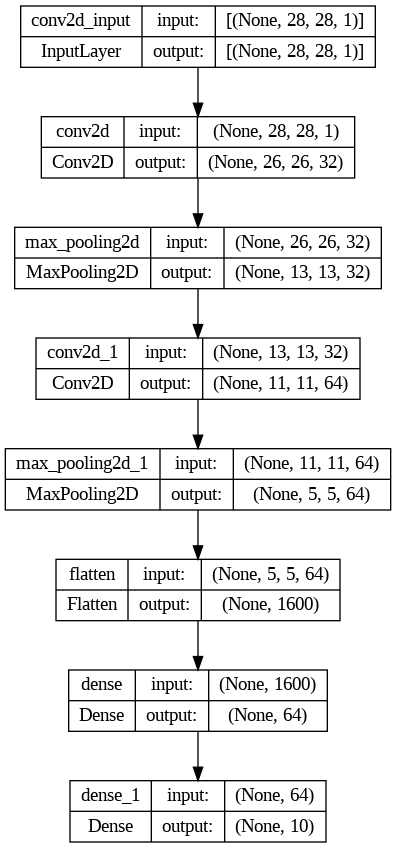

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_structure.png')

### Plotting the training and test loss

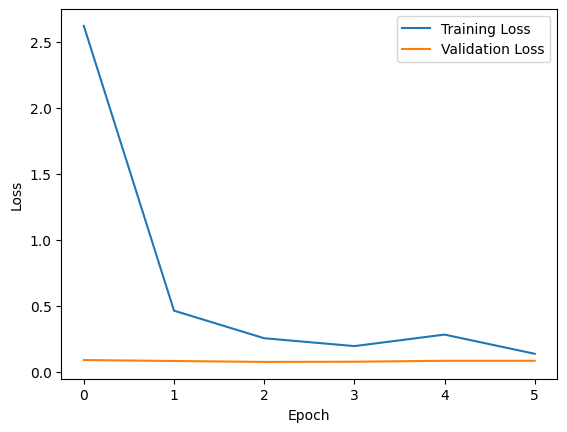

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Confusion matrix

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.95      0.99      0.97       974
           9       1.00      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



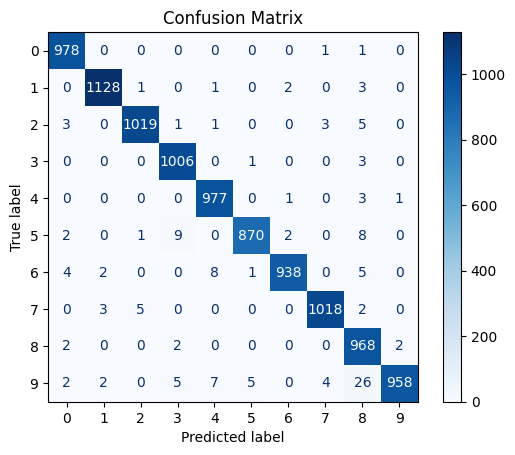

In [ ]:
y_pred=np.argmax(model.predict(x_test),axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Plotting 10 random images with color coded predictions

1/1 [==============================] - 0s 25ms/step


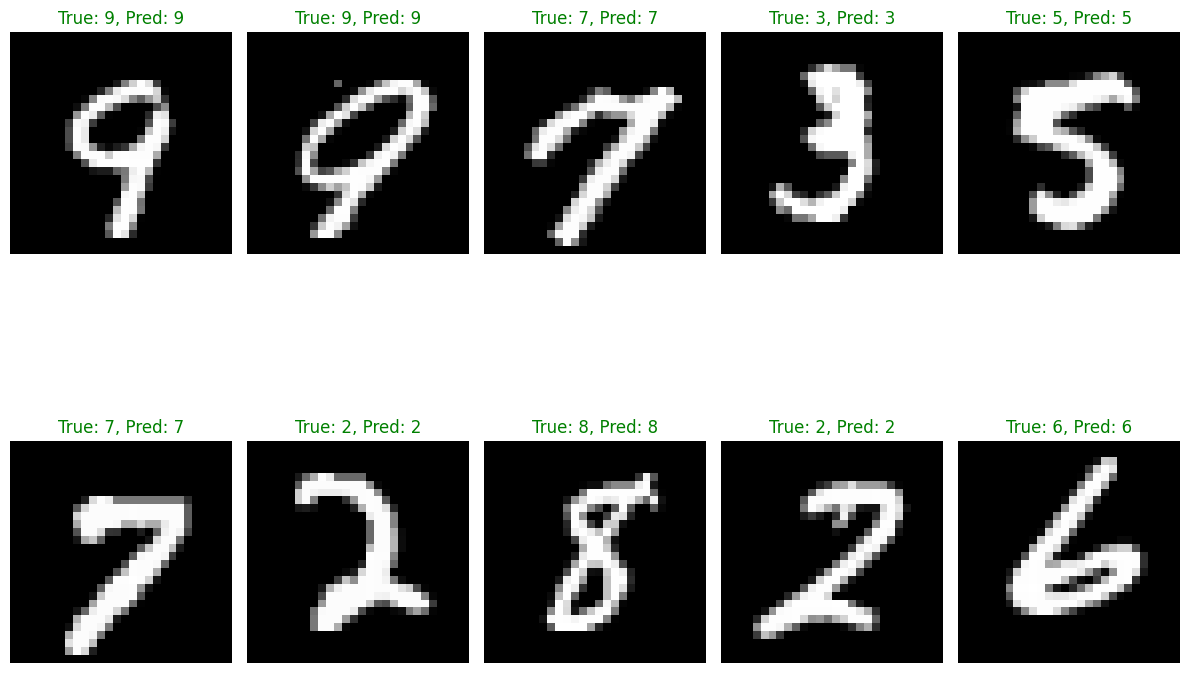

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
axes = axes.ravel()

for i in range(10):
    index = np.random.randint(0, x_train.shape[0])
    image = x_train[index].reshape(28, 28)
    label = y_train[index]
    prediction = np.argmax(model.predict(np.expand_dims(x_train[index], axis=0)))

    color = 'green' if label == prediction else 'red'
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {label}, Pred: {prediction}", color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()